In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("../data/cleaned_heart_disease.csv")

In [7]:
df.shape

(303, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [9]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [10]:
X = df.drop('num', axis=1)
Y = df['num']

In [11]:
print("Feature matrix shape:", X.shape)
print("Target variable shape:", Y.shape)

Feature matrix shape: (303, 13)
Target variable shape: (303,)


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
print('Scaled data shape:', X_scaled.shape)
print('Mean of scaled data:', np.mean(X_scaled, axis=0))
print('Std of scaled data:', np.std(X_scaled, axis=0))

Scaled data shape: (303, 13)
Mean of scaled data: [-1.46564096e-18 -2.93128191e-17 -1.67083069e-16  4.42623569e-16
  2.34502553e-16 -1.17251277e-17 -1.17251277e-17 -1.17251277e-16
 -9.08697393e-17  2.34502553e-17  1.43632814e-16 -4.69005106e-17
  1.34838968e-16]
Std of scaled data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print('PCA transformed data shape:', X_pca.shape)

PCA transformed data shape: (303, 13)


In [15]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [16]:
print('Explained variance by each component:')
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Explained variance by each component:
PC1: 0.2369 (23.69%)
PC2: 0.1231 (12.31%)
PC3: 0.0953 (9.53%)
PC4: 0.0843 (8.43%)
PC5: 0.0758 (7.58%)
PC6: 0.0679 (6.79%)
PC7: 0.0665 (6.65%)
PC8: 0.0598 (5.98%)
PC9: 0.0529 (5.29%)
PC10: 0.0433 (4.33%)
PC11: 0.0353 (3.53%)
PC12: 0.0316 (3.16%)
PC13: 0.0272 (2.72%)


In [17]:
print('Cumulative explained variance:')
for i, var in enumerate(cumulative_variance):
    print(f"First {i+1} components: {var:.4f} ({var*100:.2f}%)")

Cumulative explained variance:
First 1 components: 0.2369 (23.69%)
First 2 components: 0.3599 (35.99%)
First 3 components: 0.4553 (45.53%)
First 4 components: 0.5396 (53.96%)
First 5 components: 0.6154 (61.54%)
First 6 components: 0.6834 (68.34%)
First 7 components: 0.7499 (74.99%)
First 8 components: 0.8097 (80.97%)
First 9 components: 0.8626 (86.26%)
First 10 components: 0.9059 (90.59%)
First 11 components: 0.9412 (94.12%)
First 12 components: 0.9728 (97.28%)
First 13 components: 1.0000 (100.00%)


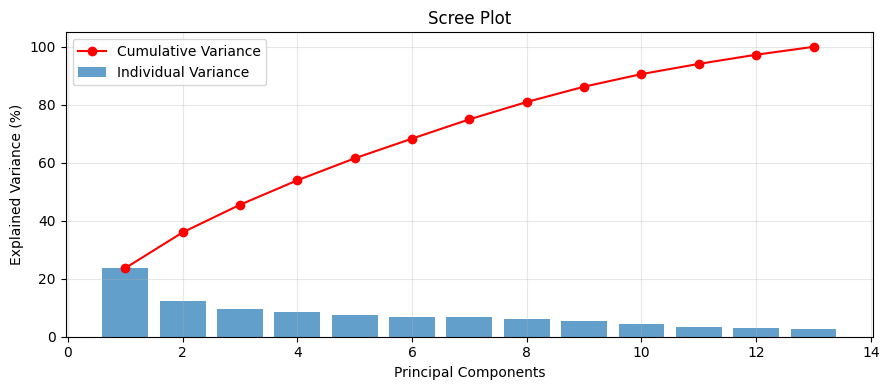

In [18]:
# Visualizations of explained variance
plt.figure(figsize=(9, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7)
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance * 100, 'ro-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.legend(['Cumulative Variance', 'Individual Variance'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

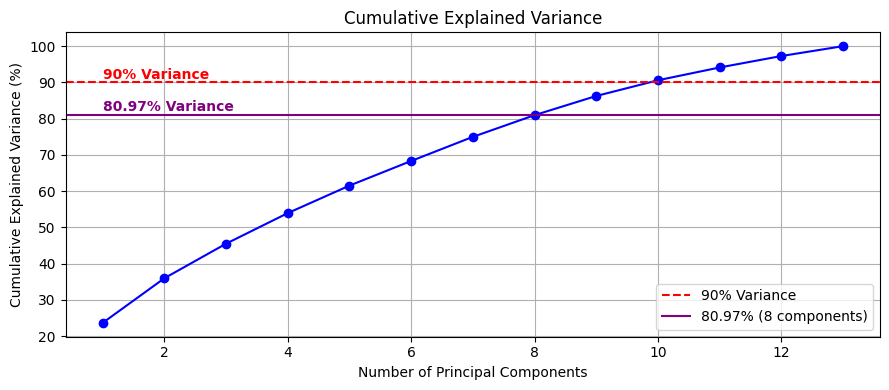

In [19]:
# Visualization of cumulative explained variance
plt.figure(figsize=(9, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 'bo-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.grid(True)

plt.axhline(y=90, color='r', linestyle='--', label='90% Variance')
plt.text(1, 91, '90% Variance', color='r', fontweight='bold')
plt.axhline(y=80.97, color='purple', linestyle='-', label='80.97% (8 components)')
plt.text(1, 82, '80.97% Variance', color='purple', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

In [20]:
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components needed for 80% variance: {n_components}")

Number of components needed for 80% variance: 8


In [21]:
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

print(f"Original data shape: {X.shape}")
print(f"Reduced data shap using PCA: {X_pca_optimal.shape}")

Original data shape: (303, 13)
Reduced data shap using PCA: (303, 8)


In [22]:
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca_optimal, columns=pca_columns)
df_pca['num'] = Y.values

In [23]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,num
0,1.162722,-0.929622,3.212341,2.248647,0.117105,0.164221,0.966571,-0.596128,0
1,3.217830,-1.451021,-0.481532,-0.849814,-0.138780,-0.631340,0.403677,1.058591,1
2,3.143604,0.636569,-0.364301,-0.607485,0.045832,-1.003931,0.681505,0.185650,1
3,-0.464908,1.409706,0.395323,2.797258,0.874659,-0.160742,-0.644582,-2.159004,0
4,-2.268663,-0.388683,-0.068956,1.170135,0.839176,-0.141872,0.729038,0.033008,0


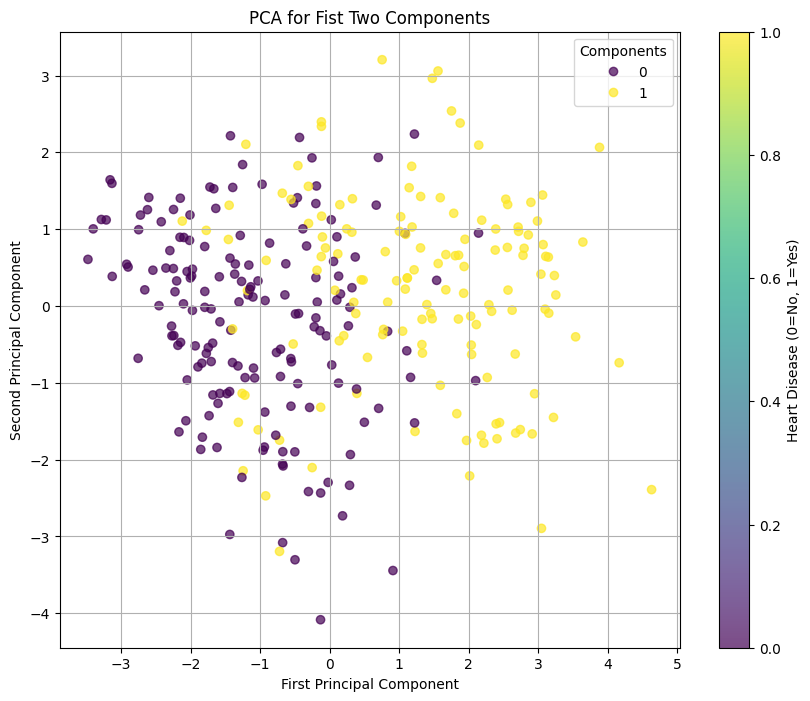

In [24]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA for Fist Two Components')
plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')
plt.legend(*scatter.legend_elements(), title="Components")
plt.grid(True)
plt.show()

In [25]:
df_pca.to_csv("../data/pca_heart_disease.csv", index=False)
print("PCA reduced data saved to '../data/pca_heart_disease.csv'")

PCA reduced data saved to '../data/pca_heart_disease.csv'
